# Predição de Preços de Imóveis em São Paulo usando Machine Learning

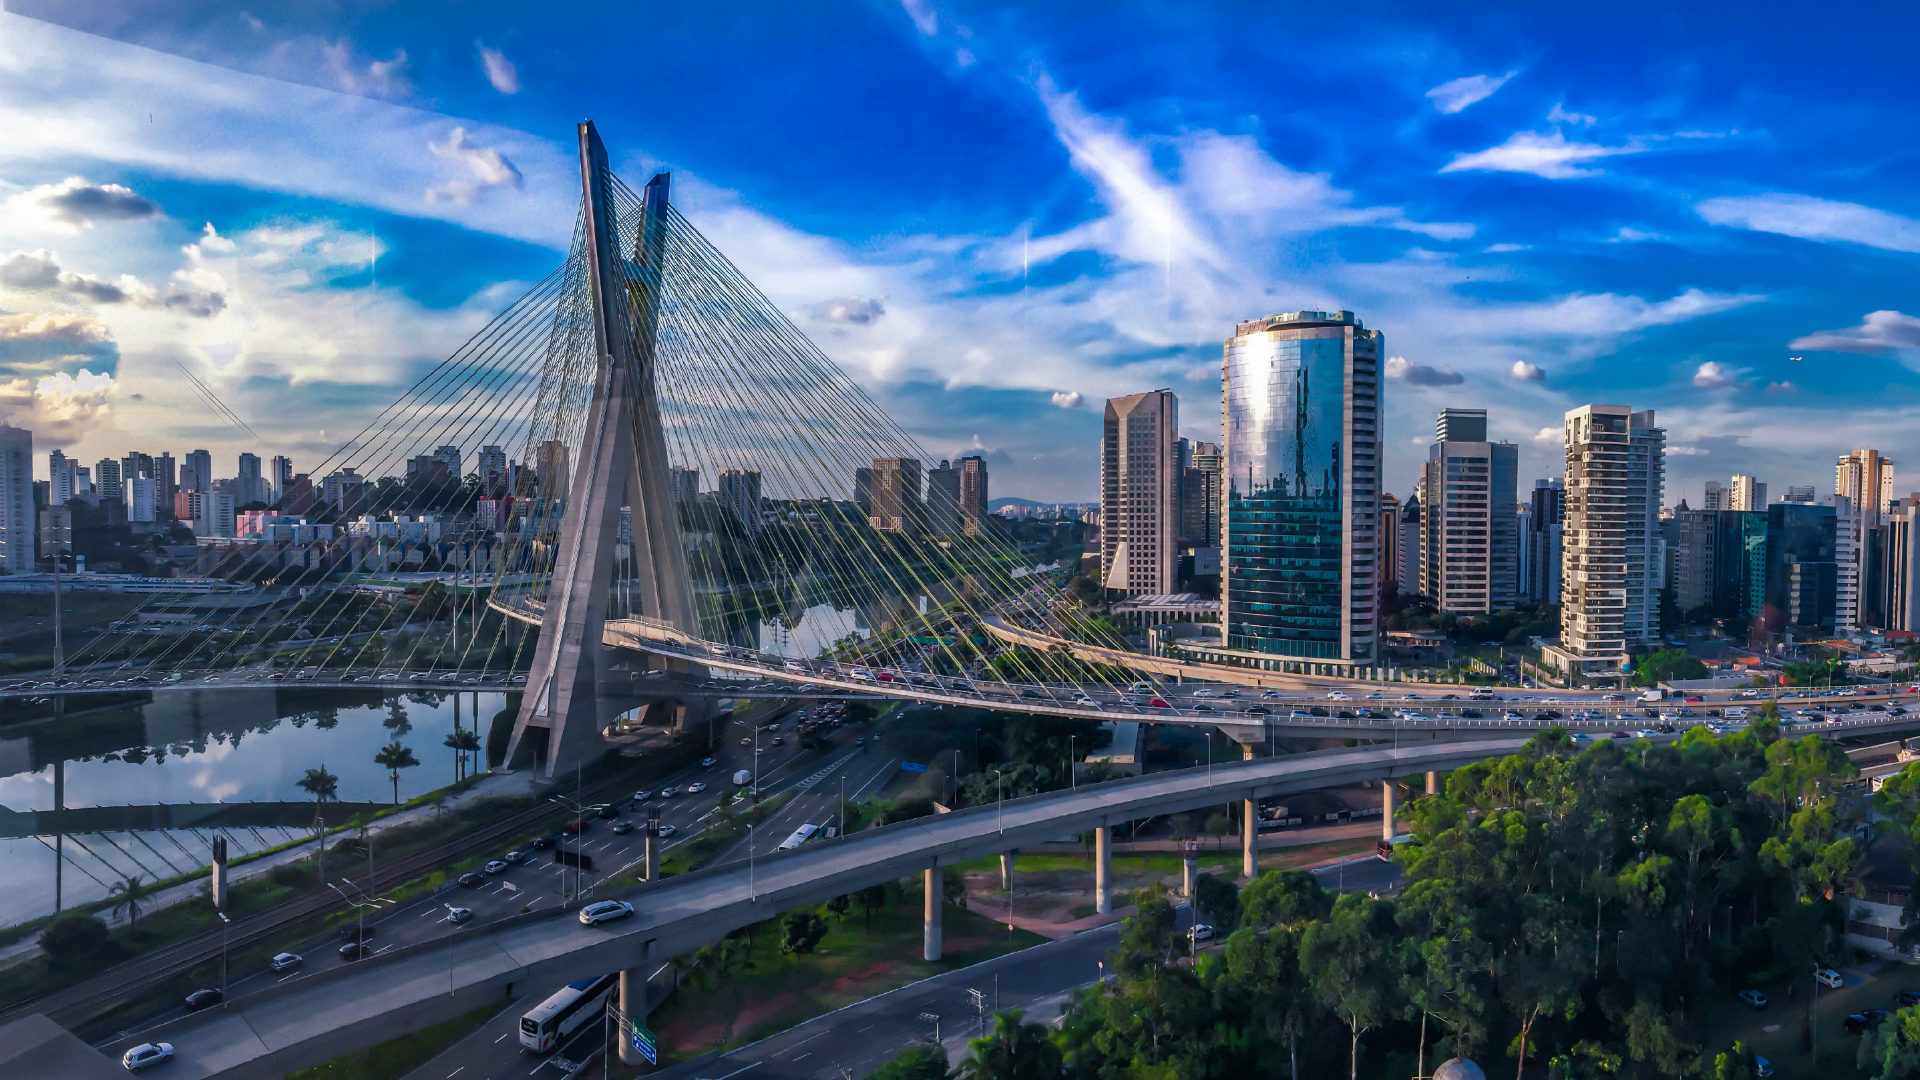

## 1. Instalando Bibliotecas

In [170]:
!pip install folium

In [171]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

## 2. Base de Dados

**Fonte:** https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019 <br>
**Dados de Abril de 2019**

In [3]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


**Feature - Descrição** <br>
• Price - Preço do Apartamento 	
• Condo - Preço do Condomínio 	<br>
• Size - 	Tamanho em Metros Quadrados <br>
• Rooms - Número de Quartos	<br>
• Toilets - Número de Banheiros	<br>
• Suites - Número de Suítes	<br>
• Parking - Vagas de Garagem	<br>
• Elevator - Possui/Não Possui Elevador	<br>
• Furnished - É/Não É Mobiliado	<br>
• Swimming Pool - Possui/Não Possui Piscina	<br>
• New	District - Bairro	<br>
• Negotiation Type - Aluguel/Venda 	<br>
• Property Type - Apartamento/Casa<br>
• Latitude - 	Localização do imóvel<br>
• Longitude - Localização do imóvel<br>

## 3. Tratamento de Dados

In [4]:
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [5]:
df['Price'] = df['Price'].astype('float')

In [6]:
#Separação de Imóveis para Venda e Aluguel
df_rent = df[df['Negotiation Type']=='rent']
df_sale = df[df['Negotiation Type']=='sale']

In [7]:
df_sale.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600.0,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000.0,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000.0,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000.0,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000.0,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890


**Excluindo Linhas com Latitude/Longitude Erradas**

In [8]:
df_sale.shape

(6412, 16)

In [9]:
validos = (df_sale.Longitude < -46) & (df_sale.Longitude > -46.9) & (df_sale.Latitude < -23) & (df_sale.Latitude > -24)
df_sale = df_sale[validos]

In [10]:
df_sale.shape

(5940, 16)

## 4. Análise Exploratória de Dados

**Distribuição Geográfica dos Imóveis**

In [172]:
mapa_1 = folium.Map(location=[-23.58,-46.67], zoom_start=12.5)
mapa_2 = folium.Map(location=[-23.58,-46.67], zoom_start=13)

In [173]:
coordenadas_1=[]
for lat,lng in zip(df_sale.Latitude.values, df_sale.Longitude.values):
  coordenadas_1.append([lat,lng])

In [174]:
mapa_1.add_child(plugins.HeatMap(coordenadas_1))        
mapa_1

**Preço dos Imóveis**

In [12]:
#Analisando os Preços dos Imóveis
display('Imóvel mais caro da base de dados: R$ {:,.2f}'.format(df_sale['Price'].max()))
display('Imóvel mais barato da base de dados: R$ {:,.2f}'.format(df_sale['Price'].min()))
display('Preço médio de um imóvel: R$ {:,.2f}'.format(df_sale['Price'].mean()))

'Imóvel mais caro da base de dados: R$ 10,000,000.00'

'Imóvel mais barato da base de dados: R$ 45,000.00'

'Preço médio de um imóvel: R$ 616,887.05'

In [13]:
bairros = df_sale.groupby('District')['Price'].mean().to_frame()
bairros = bairros.apply(lambda x: '%.2f' % x, axis=1).to_frame(name='Preco_Medio')
bairros = bairros.Preco_Medio = bairros.Preco_Medio.astype(float).to_frame()

In [14]:
#Preço Médio por Bairros - Bairros mais caros
pmb = bairros.sort_values('Preco_Medio', ascending=False).head(6)
pmb

,Preco_Medio
District,
Iguatemi/São Paulo,3665528.15
Alto de Pinheiros/São Paulo,2443442.16
Itaim Bibi/São Paulo,1896581.96
Jardim Paulista/São Paulo,1737929.58
Vila Olimpia/São Paulo,1616112.32
Moema/São Paulo,1575049.18


[Text(0.5, 1.0, 'Valor Médio por Bairro'),
 Text(0.5, 0, 'Valor (milhões de reais)'),
 Text(0, 0.5, 'Bairro')]

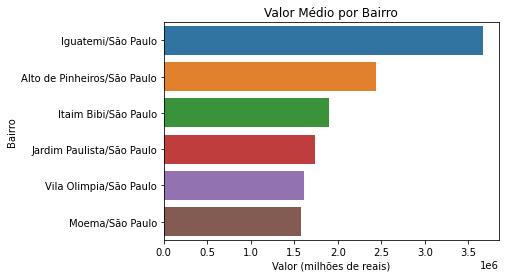

In [15]:
ax = sns.barplot(x='Preco_Medio', y=pmb.index, data=pmb, orient='h')
ax.set(title ="Valor Médio por Bairro", 
       xlabel='Valor (milhões de reais)', ylabel='Bairro')

In [16]:
#Preço Médio por Bairros - Bairros mais baratos
bairros.sort_values('Preco_Medio', ascending=True).head(6)

,Preco_Medio
District,
Cidade Tiradentes/São Paulo,113259.46
Lajeado/São Paulo,171412.82
Artur Alvim/São Paulo,191421.70
Perus/São Paulo,196079.67
Guaianazes/São Paulo,198120.20
São Rafael/São Paulo,198568.15


In [179]:
#Localização dos 100 Imóveis mais caros da Base de Dados
mais_caros = df_sale.sort_values('Price', ascending=False).iloc[0:100]

In [180]:
#Localização dos 100 Imóveis mais caros da Base de Dados
coordenadas_2=[]
for lat,lng,price in zip(mais_caros.Latitude.values, mais_caros.Longitude.values, mais_caros.Price.values):
  coordenadas_2.append([lat,lng,price])

In [181]:
#Localização dos 100 Imóveis mais caros da Base de Dados
for lat,lng,price in coordenadas_2:
    nome = 'R${:,.2f}'.format(price)
    pin = folium.Marker(location=[lat, lng], popup=nome)
    pin.add_to(mapa_2)

In [219]:
#Localização dos 100 Imóveis mais caros da Base de Dados
mapa_2

**Área dos Imóveis**

Text(0.5, 0, 'Tamanho (m2)')

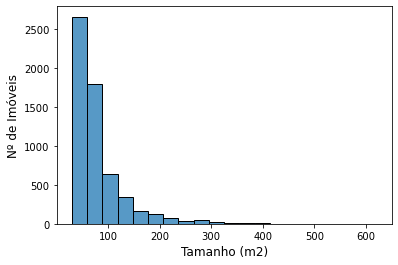

In [18]:
#Distribuição de Áreas
ax = sns.histplot(df_sale['Size'], bins=20)
ax.set_ylabel("Nº de Imóveis", fontsize = 12)
ax.set_xlabel("Tamanho (m2)", fontsize = 12)

**Quantidade de Quartos**

Text(0.5, 0, 'Nº de Quartos')

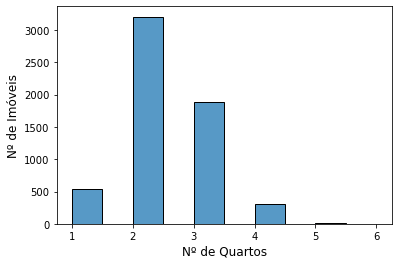

In [19]:
ax = sns.histplot(data=df_sale['Rooms'], binwidth=0.5)
ax.set_ylabel("Nº de Imóveis", fontsize = 12)
ax.set_xlabel("Nº de Quartos", fontsize = 12)

**- OBS:** 2 é o número de quartos mais comum para um apartamento listado.


**Número de Vagas de Garagem**

Text(0.5, 0, 'Nº de Quartos')

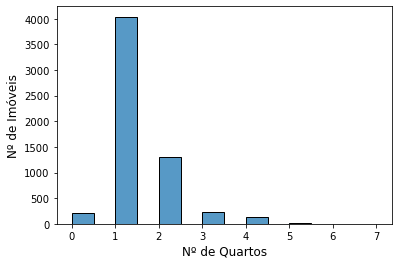

In [20]:
ax = sns.histplot(data=df_sale['Parking'], binwidth=0.5)
ax.set_ylabel("Nº de Imóveis", fontsize = 12)
ax.set_xlabel("Nº de Quartos", fontsize = 12)

**- OBS:** A maioria dos apartamentos tem 1 vaga de garagem.

**Novos X Usados**

In [21]:
#Distribuição de imóveis novos e usados
display('Imóveis novos: {:,.0f}'.format(df_sale['New'].value_counts()[1]))
display('Imóveis usados: {:,.0f}'.format(df_sale['New'].value_counts()[0]))

'Imóveis novos: 194'

'Imóveis usados: 5,746'

**Localizações**

In [22]:
# 10 bairros com mais imóveis listados
local = df_sale.value_counts('District').to_frame(name='Imóveis')
local.head(10)

,Imóveis
District,
Casa Verde/São Paulo,140
Bom Retiro/São Paulo,137
Brooklin/São Paulo,130
Moema/São Paulo,122
Bela Vista/São Paulo,120
Brás/São Paulo,117
Jaçanã/São Paulo,113
Belém/São Paulo,108
Santa Cecília/São Paulo,108


**Análise de Correlação**

<AxesSubplot:>

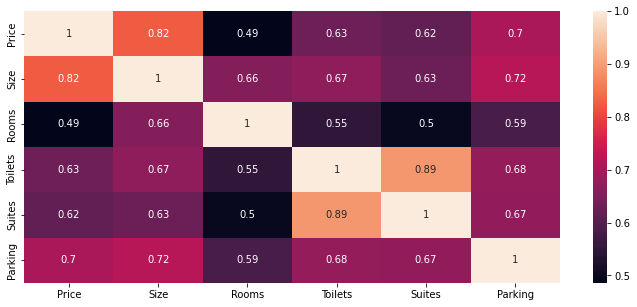

In [23]:
# Correlação entre Variáveis que definem o preço
plt.figure(figsize=(12,5))
df_sale_corr = df_sale[["Price","Size","Rooms","Toilets","Suites","Parking"]].corr()
sns.heatmap(df_sale_corr, annot=True)

**- OBS:** A análise de correlações deixa claro que variáveis como tamanho, número de quartos, de banheiros, vagas de garagem, etc, tendem a impactar positivamento no valor de um imóvel. Dentre estas, a variável que está mais correlacionada ao valor de um imóvel é o Tamanho (0.83 de correlação).

## 5. Machine Learning para Previsão de Preços

In [201]:
#Excluindo colunas dispensáveis
df_sale_clean = df_sale.drop(["Negotiation Type", "Property Type"], axis=1)

In [202]:
#Gerando dummies
sale_dum = pd.get_dummies(df_sale_clean['District'])

In [203]:
sale_dum.head()

,Alto de Pinheiros/São Paulo,Anhanguera/São Paulo,Aricanduva/São Paulo,Artur Alvim/São Paulo,Barra Funda/São Paulo,Bela Vista/São Paulo,Belém/São Paulo,Bom Retiro/São Paulo,Brasilândia/São Paulo,Brooklin/São Paulo,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
4901,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4902,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4903,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4904,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4905,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [204]:
#Criando novo Data Frame
df_sale2 = df_sale_clean.drop('District', axis=1)
df_sale2 = df_sale2.merge(sale_dum, left_on= df_sale2.index, right_on= sale_dum.index)
df_sale2.head()

,key_0,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,4901,732600.0,1000,74,1,2,1,2,1,0,...,0,0,1,0,0,0,0,0,0,0
1,4902,1990000.0,2400,164,4,5,2,3,1,1,...,0,0,1,0,0,0,0,0,0,0
2,4903,720000.0,700,70,2,2,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4904,1680000.0,1580,155,3,5,3,2,1,0,...,0,0,1,0,0,0,0,0,0,0
4,4905,1200000.0,900,56,2,2,1,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [205]:
Y_sale = df_sale2['Price']
X_sale = df_sale2.loc[:, df_sale2.columns!='Price']

**Modelos de Treino e Teste**

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
x_sale_train, x_sale_test, y_sale_train, y_sale_test = train_test_split(X_sale, Y_sale, test_size=0.3, random_state=42)

**Treinamento dos Modelos**

In [208]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_sale = RandomForestRegressor()
rf_reg_sale.fit(x_sale_train, y_sale_train)

RandomForestRegressor()

In [209]:
y_sale_pred = rf_reg_sale.predict(x_sale_test)

In [210]:
y_sale_pred

array([ 356994.06,  428679.45,  334875.87, ..., 1228319.49,  322493.54,
        201175.76])

**Avaliação Visual**

In [211]:
# Comparação entre valores reais e valores previstos pelo modelo
Preco_real_venda = pd.DataFrame(y_sale_test)
Preco_real_venda = Preco_real_venda.reset_index()

In [212]:
# Comparação entre valores reais e valores previstos pelo modelo
Preco_previsto_venda = pd.DataFrame(y_sale_pred, columns=['Previsao'])
Preco_previsto_venda.head()

,Previsao
0,356994.06
1,428679.45
2,334875.87
3,630785.98
4,1303342.90


In [213]:
# Comparação entre valores reais e valores previstos pelo modelo
Comparacao_precos_venda = Preco_real_venda.join(Preco_previsto_venda)
Comparacao_precos_venda = Comparacao_precos_venda.drop('index', axis=1)
Comparacao_precos_venda = Comparacao_precos_venda.rename(columns={'Price':'Preco_real'})

In [214]:
# Comparação entre valores reais e valores previstos pelo modelo
Comparacao_precos_venda

,Preco_real,Previsao
0,296000.0,356994.06
1,300000.0,428679.45
2,320000.0,334875.87
3,583000.0,630785.98
4,890000.0,1303342.90
...,...,...
1777,1870000.0,2556800.00
1778,276596.0,214705.94
1779,1220000.0,1228319.49
1780,390000.0,322493.54


In [215]:
#Imóveis com diferença entre valor calculado e valor real menor que R$100,00
Comparacao_precos_venda[abs(Comparacao_precos_venda.Preco_real - Comparacao_precos_venda.Previsao)<100]

,Preco_real,Previsao
281,705000.0,704930.00
511,219000.0,219065.00
614,300000.0,299926.31
615,229000.0,228942.00
1097,239999.0,239944.49
1186,191700.0,191766.00
1235,239000.0,238954.98
1671,199999.0,199936.37


**Métricas**

In [216]:
rf_reg_sale.score(x_sale_test, y_sale_test)

0.8921935069656282

In [217]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
print("MAE: {}".format(mean_absolute_error(y_sale_test, y_sale_pred)))

MAE: 95789.97679012346


In [218]:
# mean_squared_error
from sklearn.metrics import mean_squared_error
import math
print("MSE: {}".format(mean_squared_error(y_sale_test, y_sale_pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_sale_test, y_sale_pred))))

MSE: 48355838064.23991
RMSE: 219899.609058861


## 6. Conclusão

Conseguimos obter resultados satisfatórios com a aplicação de Machine Learning para previsão de preços para as apartamentos na cidade de São Paulo. 

Alcançar resultados ainda melhores requer o enriquecimento do conjunto de dados de forma mais profissional, levando em conta dados como:

• Estado do Apartamento, <br>
• Proximidade do Metrô,<br>
• Orientação do Sol,<br>
• Proximidade de Parques e Lazer,<br>
• Estruturas do Condomínio,<br>
• Etc.